In [1]:
# imports
import os
import sys
import numpy as np

from sklearn.utils import shuffle

import sys
sys.path.append('../src/')
    
from evaluation import alpha_variance, mean_accuracy
from network import line_network, synthetic_graph
from optimization import average_FW, local_FW
from utils import load_wine_dataset, generate_models, generate_samples

## Average policy's convergence


In [2]:
NB_ITER = 10
D = 50 # nb dimensions
N = 50 # nb base classifiers
random_state = 1
V, theta_true, cluster_indexes = generate_models(random_state=random_state)
_, X, Y, X_test, Y_test, _, _ = generate_samples(V, theta_true, D, random_state=random_state)

# set graph
nodes = synthetic_graph(X, Y, X_test, Y_test, V, theta_true)

# init optimization variables
for n in nodes:
    n.init_matrices(N)

# set callbacks for optimization analysis
callbacks = {
    'alpha-variance': alpha_variance,
    'mean-accuracy': mean_accuracy
}

# local learning
results_local = local_FW(nodes, NB_ITER, callbacks=callbacks)

# global consensus
results_global = average_FW(nodes, NB_ITER, callbacks=callbacks)   

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Compare average accuracies 
two iterative FW algorithms. At each iteration
1. local indipendent optimization (**local**)
2. local optimization + average alpha between neighbors (**global**)

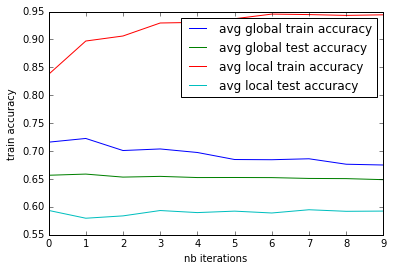

In [4]:
plt.xlabel('nb iterations')
plt.ylabel('mean accuracy')
plt.plot(range(NB_ITER), [r['mean-accuracy'][0] for r in results_global], label='avg global train accuracy')
plt.plot(range(NB_ITER), [r['mean-accuracy'][1] for r in results_global], label='avg global test accuracy')
plt.plot(range(NB_ITER), [r['mean-accuracy'][0] for r in results_local], label='avg local train accuracy')
plt.plot(range(NB_ITER), [r['mean-accuracy'][1] for r in results_local], label='avg local test accuracy')

plt.legend()

- Local policy overfits
- at first iteration, averaging alphas between neighbors improves test accuracy
- keeping on averaging degrades train-test accuracies

### Convergence analysis
study the variance between the local alphas (weights of the base classifiers) for both policies

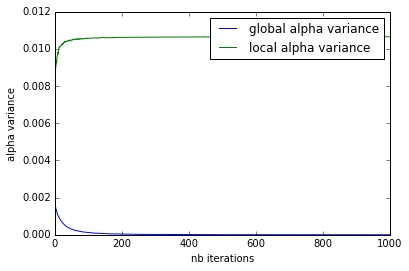

In [11]:
plt.xlabel('nb iterations')
plt.ylabel('alpha variance')
plt.plot(range(NB_ITER), [r['alpha-variance'] for r in results_global], label='global alpha variance')
plt.plot(range(NB_ITER), [r['alpha-variance'] for r in results_local], label='local alpha variance')

plt.legend()

The global consensus algorithm converges (variance tends to 0)